In [2]:
#lets read the csv file using pandas 
import pandas as pd
dataset = pd.read_csv('estate_data.csv')

In [4]:
dataset

,number_of_rooms,floor,area,address,date,price
0,1,1,58.0,Сомони,Сегодня 21:56,330000
1,1,14,68.0,92 мкр,Сегодня 21:56,340000
2,3,8,50.0,NaN,Сегодня 21:55,700000
3,3,14,84.0,112 мкр,Сегодня 21:51,700000
4,3,3,83.0,фабрика Ширин,Сегодня 21:48,415000
...,...,...,...,...,...,...
5574,4,16,125.0,Ориентир Кафе Сорбон,08.01.2022 09:51,600000
5575,2,17,71.0,Ориентир Торгово-Жилой Комплекс Ватан,07.01.2022 15:18,489900
5576,1,9,51.0,Ориентир Бизнес Центр SAS,06.01.2022 14:41,361220
5577,6,6,200.0,ориентир Опера,06.01.2022 14:08,1500000


In [ ]:
dataset1 = dataset.drop(['address', 'date'], axis=1)

In [ ]:
dataset1

In [8]:
#here we are calssifying dataset into dependent and independent variables
x = dataset1.iloc[:, : -1]
y = dataset1.iloc[:, -1]

In [9]:
#lets now split the dataset into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
#now lets apply knn regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [11]:
#now predict the values using our model
y_pred = knn.predict(x_test)

In [12]:
y_pred

array([276800.        , 494559.86666667, 749561.2       , ...,
       933161.06666667, 649280.        , 630666.66666667])

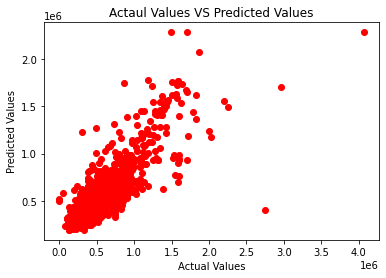

In [13]:
#now lets make a graph and see
import matplotlib.pyplot as plt
test = plt
test.scatter(y_test, y_pred, color="red")
test.title("Actaul Values VS Predicted Values")
test.xlabel("Actual Values")
test.ylabel("Predicted Values")
test.show()

In [14]:
#now lets calculate models accuray by finding mean absolute error
from sklearn.metrics import mean_absolute_error, r2_score
import math as math
print("Mean Absoluet Error (MAE) is ", mean_absolute_error(y_test, y_pred))
print("Root Mean Absolute Error (RMAE) is ", math.sqrt(mean_absolute_error(y_test, y_pred)))
print("R2 is ", r2_score(y_test, y_pred))

Mean Absoluet Error (MAE) is  129371.98614097969
Root Mean Absolute Error (RMAE) is  359.68317467040305
R2 is  0.6780849183771409
